In [1]:
import sys
sys.path.append("..")
%cd ..

/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021


In [46]:
from DataPrep.load_data import load_data
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from DataPrep.LagCreation import lags


In [51]:
df = load_data()
df = df.drop(columns=["Charging Time (mins)","Parking Time (mins)"])

In [52]:
l = lags()

In [53]:
df = df.sort_index()

In [54]:
df = df.fillna(0)

In [55]:
df = l.buildLaggedFeatures(df, ["Energy (kWh)"])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Energy (kWh)"]), df["Energy (kWh)"], shuffle=False)

In [57]:
regressor = LinearRegression().fit(X_train, y_train)

In [65]:
y_pred = regressor.predict(X_test)

In [66]:
r2_score(y_test, y_pred)

0.24381415760291247

<IPython.core.display.Javascript object>

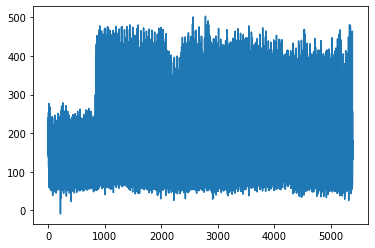

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

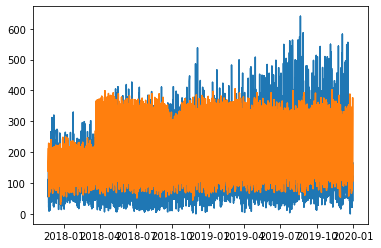

In [60]:
plt.plot(y_test.index,y_test)
plt.plot(y_test.index,y_pred)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

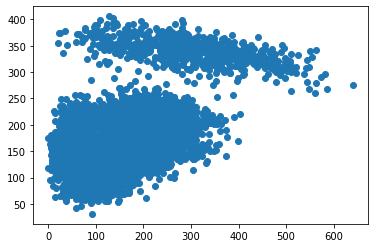

In [61]:
plt.scatter(y_test,y_pred)
plt.show()

In [67]:
np.square(mean_squared_error(y_test,y_pred))

<IPython.core.display.Javascript object>

48515321.03593496

In [63]:
for i in df.Label.unique():
    reg = LinearRegression().fit(X_train[X_train.Label == i], y_train[X_train.Label == i])
    y_pred = regressor.predict(X_test[X_test.Label == i])
    print("-"*30)
    print(f'Label: {i}')
    print(r2_score(y_test[X_test.Label == i], y_pred))
    print(np.sqrt(mean_squared_error(y_test[X_test.Label == i], y_pred)))
    print("-"*30)


------------------------------
Label: 1
-0.09739443825339378


<IPython.core.display.Javascript object>

70.80833835615469
------------------------------
------------------------------
Label: 5
-0.106952058373053


<IPython.core.display.Javascript object>

66.16549144740581
------------------------------
------------------------------
Label: 6
-0.17173577052568634


<IPython.core.display.Javascript object>

133.5035592906998
------------------------------
------------------------------
Label: 2
-0.25060382597407194


<IPython.core.display.Javascript object>

84.87646499425128
------------------------------
------------------------------
Label: 3
-4.034723569675795


<IPython.core.display.Javascript object>

71.56917259029626
------------------------------
------------------------------
Label: 4
-5.021920406499318


<IPython.core.display.Javascript object>

89.39900326963316
------------------------------
------------------------------
Label: 0
-0.19571606521981422


<IPython.core.display.Javascript object>

35.04899842051396
------------------------------
